In [2]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install replicate
!pip install langchain_community
!pip install langchain_experimental
!pip install -U langchain langchain-community langchain_experimental replicate

  Using cached langchain-1.0.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached langchain_community-0.4.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached langchain_core-1.0.4-py3-none-any.whl.metadata (3.5 kB)
  Using cached langgraph-1.0.2-py3-none-any.whl.metadata (7.4 kB)
INFO: pip is looking at multiple versions of langchain-experimental to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_experimental-0.3.4-py3-none-any.whl.metadata (1.7 kB)
  Using cached langchain_experimental-0.3.3-py3-none-any.whl.metadata (1.7 kB)
  Using cached langchain_experimental-0.3.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached langchain_experimental-0.3.1.post1-py3-none-any.whl.metadata (1.7 kB)
INFO: pip is still looking at multiple versions of langchain-experimental to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_experimental-0.3.1-py3-none-any.whl.metadata (1.7 

In [3]:
from google.colab import userdata
import os

api_token = userdata.get('api_token')
os.environ['REPLICATE_API_TOKEN'] = api_token

In [6]:
from langchain_community.llms import Replicate

llm = Replicate(
    model = "ibm-granite/granite-3.3-8b-instruct"
)

In [5]:
df = pd.read_csv('StudentsPerformance.csv')
display(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
for row in df:
  print(f"Data: {row}")

  prompt = f"""Help me to Analyst each row where is functionable to be useful, less useful, non useful and give me the explanation
  {row}
  """

  print(f"Prompt: {prompt}")

  output = llm.invoke(prompt)
  print(f"AI Output: {output}")
  print("------")

In [8]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,
)

In [9]:
agent.invoke({"input": "Help me to drop na and drop duplicate and store into variable df"})

In [10]:
# Display the number of NA
print("Number of NA values per column:")
display(df.isnull().sum())

# Display the number of duplicate
print("\nNumber of duplicate rows:")
display(df.duplicated().sum())

Number of NA values per column:


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0



Number of duplicate rows:


np.int64(0)

In [11]:
#Make table AVG
df['avg score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
display(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [12]:
#Select table needed
df = df[['race/ethnicity','parental level of education', 'test preparation course', 'math score', 'reading score', 'writing score', 'avg score']]
display(df)

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,avg score
0,group B,bachelor's degree,none,72,72,74,72.666667
1,group C,some college,completed,69,90,88,82.333333
2,group B,master's degree,none,90,95,93,92.666667
3,group A,associate's degree,none,47,57,44,49.333333
4,group C,some college,none,76,78,75,76.333333
...,...,...,...,...,...,...,...
995,group E,master's degree,completed,88,99,95,94.000000
996,group C,high school,none,62,55,55,57.333333
997,group C,high school,completed,59,71,65,65.000000
998,group D,some college,completed,68,78,77,74.333333


In [13]:
#Analyst of parental education
parental_education = df.groupby('parental level of education')[['math score', 'reading score', 'writing score', 'avg score']].mean()
display(parental_education.sort_values('avg score',
                                       ascending=False))

,math score,reading score,writing score,avg score
parental level of education,,,,
master's degree,69.745763,75.372881,75.677966,73.598870
bachelor's degree,69.389831,73.000000,73.381356,71.923729
associate's degree,67.882883,70.927928,69.896396,69.569069
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007
high school,62.137755,64.704082,62.448980,63.096939


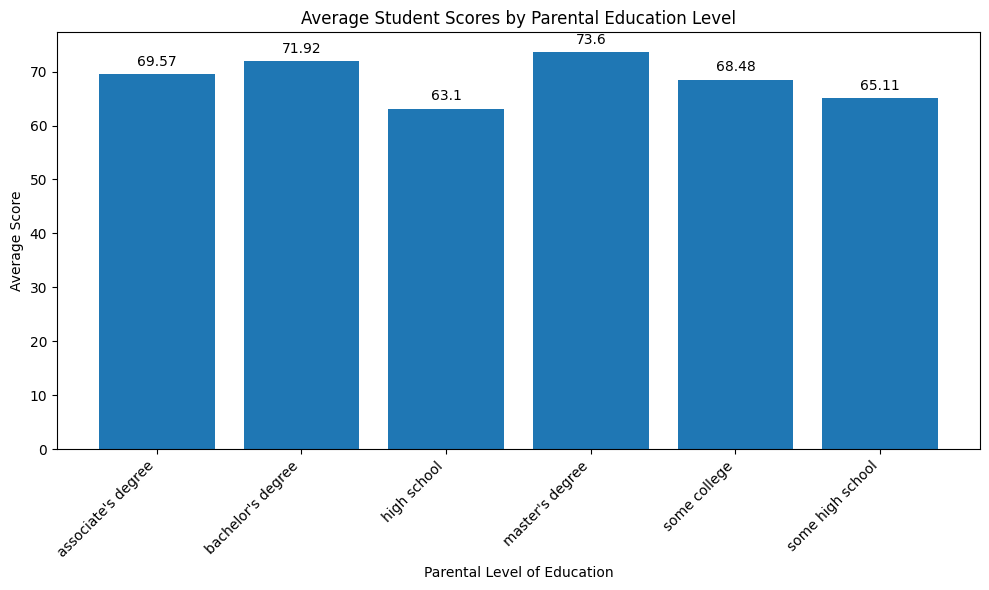

In [14]:
#Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(parental_education.index, parental_education['avg score'])
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.title('Average Student Scores by Parental Education Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, value + 1, round(value, 2), ha='center', va='bottom')

plt.show()

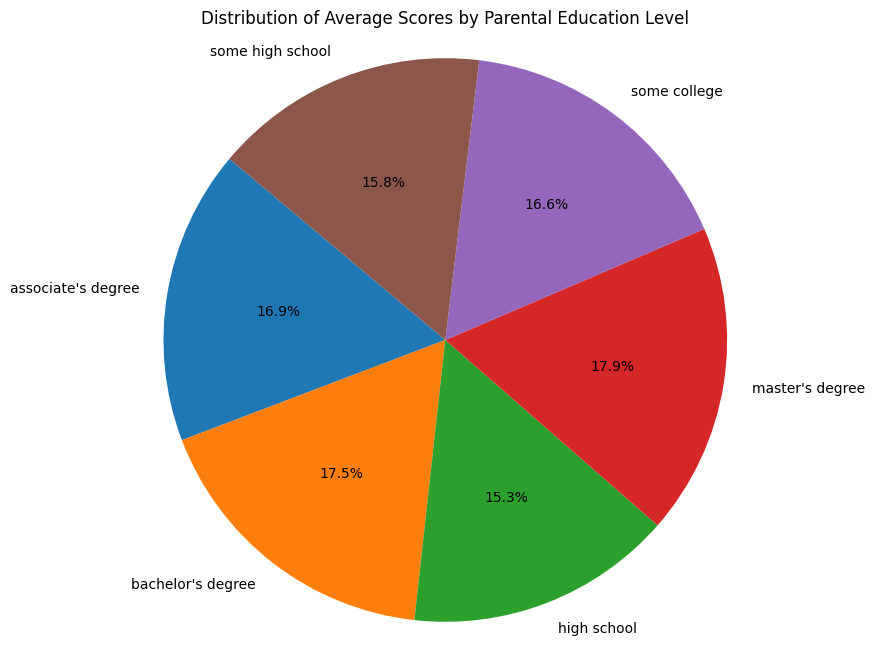

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(parental_education['avg score'], labels=parental_education.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Average Scores by Parental Education Level')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [16]:
#Another analyst using test preparation
test_preparation = df.groupby('test preparation course')[['math score', 'reading score', 'writing score', 'avg score']].mean()
display(test_preparation.sort_values('avg score', ascending=False))

,math score,reading score,writing score,avg score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


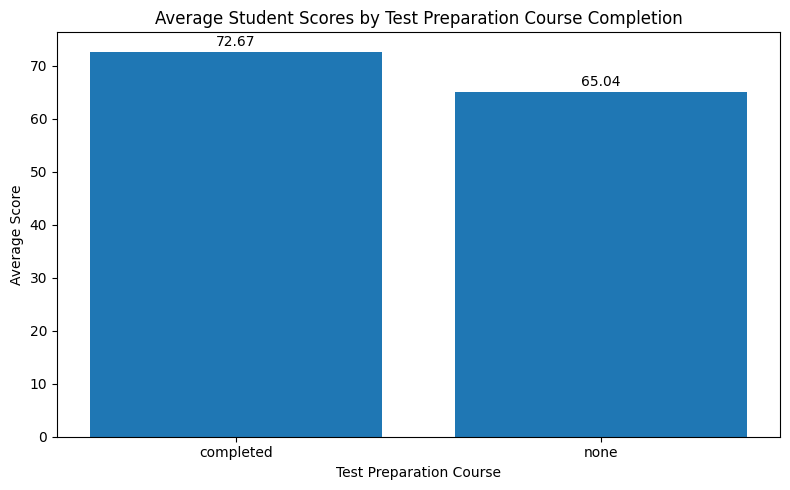

In [17]:
plt.figure(figsize=(8, 5))
bars = plt.bar(test_preparation.index, test_preparation['avg score'])
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.title('Average Student Scores by Test Preparation Course Completion')
plt.xticks(rotation=0)
plt.tight_layout()

for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.5, round(value, 2), ha='center', va='bottom')

plt.show()

In [18]:
#Another analyst using race/ethnicity + test preparation course
race_test_score = df.groupby(['race/ethnicity', 'test preparation course'])[['math score', 'reading score', 'writing score', 'avg score']].mean()
display(race_test_score.sort_values('avg score', ascending=False))

,,math score,reading score,writing score,avg score
race/ethnicity,test preparation course,,,,
group E,completed,77.433333,76.666667,75.983333,76.694444
group D,completed,69.792683,74.146341,76.658537,73.532520
group C,completed,67.495726,73.658120,74.452991,71.868946
group B,completed,67.191176,72.852941,71.882353,70.642157
group A,completed,68.258065,71.032258,70.903226,70.064516
group E,none,71.112500,70.300000,67.975000,69.795833
group D,none,66.255556,68.155556,67.177778,67.196296
group C,none,62.707921,66.465347,63.990099,64.387789
group B,none,61.368852,64.286885,62.098361,62.584699


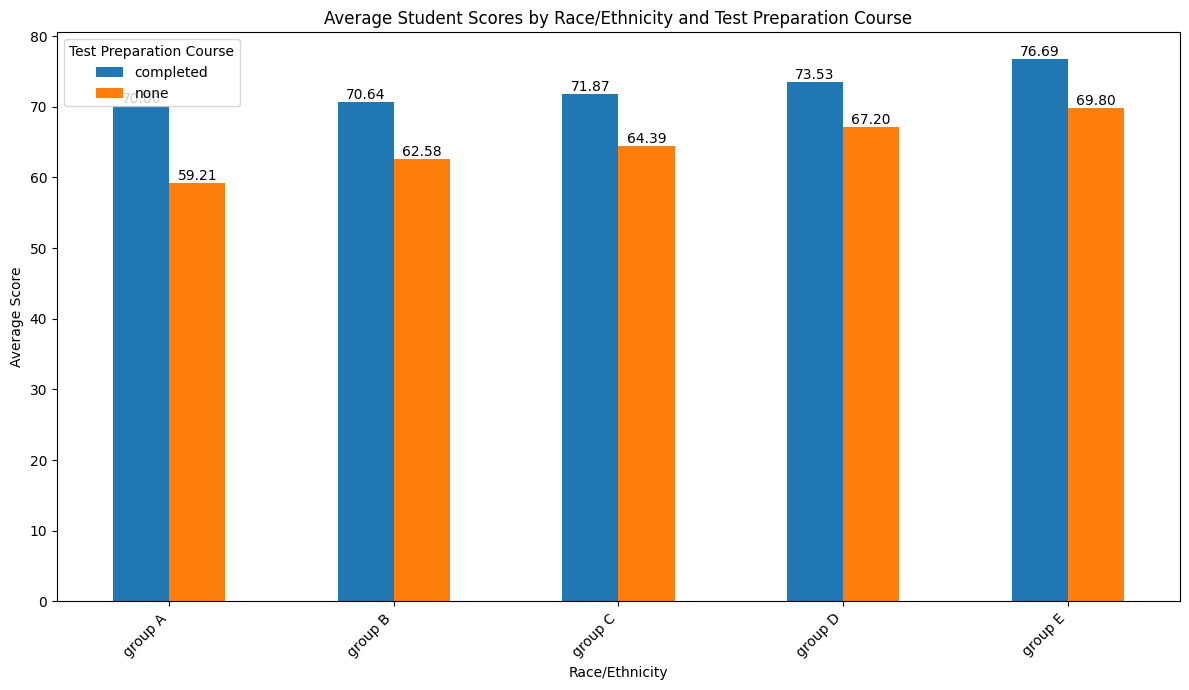

In [19]:
# Unstack the data for easier plotting
race_test_score = race_test_score['avg score'].unstack()

ax = race_test_score.plot(kind='bar', figsize=(12, 7))
plt.title('Average Student Scores by Race/Ethnicity and Test Preparation Course')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Test Preparation Course')
plt.tight_layout()

# Add the score labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.show()